In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.preprocessing import PolynomialFeatures

### Polynomial Regression

Polynomial features

x, y, z  x*x, y*y, z*z (variable itself) xy, xz, yz (variable interaction)

We can make linear regression over this 9 variables -- applying linear regression for something that is not linear (9 variables)

We can have these polynomial features as a line

In [14]:
x = np.arange(6).reshape(3, 2)

In [18]:
poly = PolynomialFeatures(2)  # second degree interaction_only = True will eliminate degree attributes
poly

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [4]:
x_transformed = poly.fit_transform(x) #gives the new features
x_transformed

array([[  1.,   0.,   1.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.],
       [  1.,   4.,   5.,  16.,  20.,  25.]])

In [15]:
print(poly.n_input_features_)
print(poly.n_output_features_)

2
6


In [17]:
print(poly.get_feature_names()) # not working

AttributeError: 'PolynomialFeatures' object has no attribute 'get_feature_names'

Test data

In [43]:
x = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8])

quadratic = PolynomialFeatures(degree = 2)
cubic = PolynomialFeatures(degree = 3)
quartic = PolynomialFeatures(degree = 4)

x_quad = quadratic.fit_transform(x)
x_cubic = cubic.fit_transform(x)
x_quartic = quartic.fit_transform(x)

In [44]:
lin_model = LinearRegression()
quad_model = LinearRegression()
cubic_model = LinearRegression()
quartic_model = LinearRegression()

lin_model.fit(x.reshape(-1,1), y)
quad_model.fit(x_quad, y)
cubic_model.fit(x_cubic, y)
quartic_model.fit(x_quartic, y)

#quad_model.fit(quadratic.fit_transform(x), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

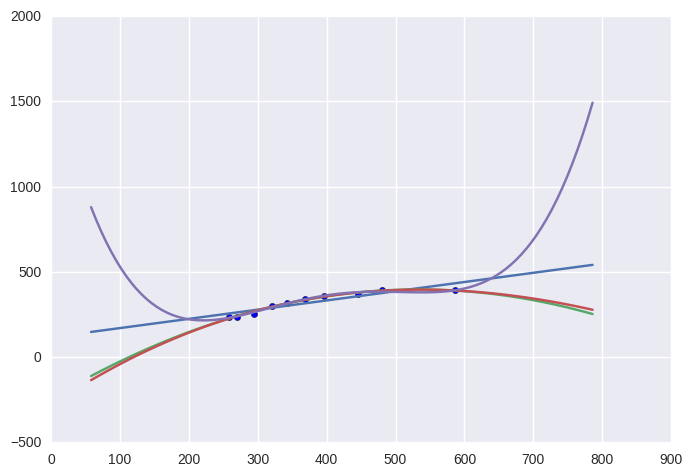

In [45]:
#x_test = np.arange(250, 600, 10)[:, np.newaxis]
#x_test = np.linspace(min(x), max(x), 100)
x_test = np.linspace(min(x) - 200, max(x) + 200, 100)  # extrapolate

y_lin_model = lin_model.predict(x_test.reshape(-1,1))
y_quad_model = quad_model.predict(quadratic.fit_transform(x_test.reshape(-1,1)))
y_cubic_model = cubic_model.predict(cubic.fit_transform(x_test.reshape(-1,1)))
y_quartic_model = quartic_model.predict(quartic.fit_transform(x_test.reshape(-1,1)))

# TODO: Plot test points

# plt.plot(y_lin_model)
# plt.plot(y_quad_model)
# plt.plot(y_cubic_model)
plt.scatter(x,y)
plt.plot(x_test, y_lin_model)
plt.plot(x_test, y_quad_model)
plt.plot(x_test, y_cubic_model)
plt.plot(x_test, y_quartic_model)